#Install libraries

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!pip install -q xlrd

In [77]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
!pip install plotly_express==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
!pip install vadersentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
!pip install mord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Libraries

In [88]:
import re
import pandas as pd
import numpy as np 
import requests
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import wikipedia

import googletrans
from googletrans import *
from langdetect import detect

from underthesea import sent_tokenize
from underthesea import word_tokenize
from underthesea import pos_tag

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet 
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download("vader_lexicon") 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split 
nltk.download('averaged_perceptron_tagger')

import mord
from mord import LogisticIT
from dmba import regressionSummary, classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#Import data

In [89]:
from google.colab import drive
drive.mount('/content/drive')

df =pd.read_excel("/content/drive/MyDrive/python/Reviews.xlsx")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Understanding the data

In [90]:
df.head()

,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text
0,1,B001E4KFG0,delmartian,1,1,5,"Reviewed in the United States on October 14, 2022",Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,dll pa,0,0,1,"Reviewed in the United States on October 19, 2022",Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,"Natalia Corres ""Natalia Corres""",1,1,4,"Reviewed in the United States on August 22, 2022","""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,Karl,3,3,2,"Reviewed in the United States on October 13, 2022",Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",0,0,5,"Reviewed in the United States on September 10,...",Great taffy,Great taffy at a great price. There was a wid...


In [91]:
df.tail(5)

,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text
47659,47660,B0088OIA66,Yini-Rowenna Dubois,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My cats love some of the variety pack flavors.,They like the product and it's healthy (accord...
47660,47661,B0088OIA66,Christian S. Tice,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My Cat loves this stuff...,My 13-year old male cat has been a non-fish ea...
47661,47662,B0088OIA66,Lynnster,0,0,3,"Reviewed in the United States 🇺🇸 on April 30, ...","Too much fish for a variety pack, but....",I bought this variety pack so my cats could tr...
47662,47663,B004P13CN2,Jeddy 3,12,12,5,"Reviewed in the United States 🇺🇸 on April 30, ...",Better and cheaper than 5-Hour Energy,"I'm not an ""energy-shot"" kind of person genera..."
47663,47664,B004P13CN2,Xevious,5,6,5,"Reviewed in the United States 🇺🇸 on April 30, ...",OH YEAH!,I work in a hot warehouse 12hrs for 4 days a w...


In [92]:
df.shape
## showing data has 108276 rows and 9 columns

(47664, 9)

In [93]:
df.info()
## The kind of type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47664 entries, 0 to 47663
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      47664 non-null  int64 
 1   review_product          47664 non-null  object
 2   review_name             47654 non-null  object
 3   HelpfulnessNumerator    47664 non-null  int64 
 4   HelpfulnessDenominator  47664 non-null  int64 
 5   review_rating           47664 non-null  int64 
 6   review_date             47664 non-null  object
 7   review_title            47661 non-null  object
 8   review_text             47664 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.3+ MB


In [94]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,review_rating
count,47664.000000,47664.000000,47664.000000,47664.000000
mean,23832.500000,1.603978,2.057654,4.150827
std,13759.555952,5.649225,6.237011,1.322038
min,1.000000,0.000000,0.000000,1.000000
25%,11916.750000,0.000000,0.000000,4.000000
50%,23832.500000,0.000000,1.000000,5.000000
75%,35748.250000,2.000000,2.000000,5.000000
max,47664.000000,398.000000,401.000000,5.000000


In [95]:
df.columns
## Show name of columns in data

Index(['Id', 'review_product', 'review_name', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'review_rating', 'review_date',
       'review_title', 'review_text'],
      dtype='object')

In [96]:
df.nunique()
##Showing them the unique values

Id                        47664
review_product             5921
review_name               35357
HelpfulnessNumerator        101
HelpfulnessDenominator      108
review_rating                 5
review_date               36248
review_title              37319
review_text               44115
dtype: int64

#EDA_Data Cleaning

##Duplicates and Null

In [97]:
##Check Duplicates and Null
df.isnull().sum()

Id                         0
review_product             0
review_name               10
HelpfulnessNumerator       0
HelpfulnessDenominator     0
review_rating              0
review_date                0
review_title               3
review_text                0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
##Recheck 
df.isnull().sum()

Id                         0
review_product             0
review_name               10
HelpfulnessNumerator       0
HelpfulnessDenominator     0
review_rating              0
review_date                0
review_title               3
review_text                0
dtype: int64

In [100]:
df.duplicated().sum()


0

In [101]:
df.dropna()

,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text
0,1,B001E4KFG0,delmartian,1,1,5,"Reviewed in the United States on October 14, 2022",Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,dll pa,0,0,1,"Reviewed in the United States on October 19, 2022",Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,"Natalia Corres ""Natalia Corres""",1,1,4,"Reviewed in the United States on August 22, 2022","""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,Karl,3,3,2,"Reviewed in the United States on October 13, 2022",Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",0,0,5,"Reviewed in the United States on September 10,...",Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
47659,47660,B0088OIA66,Yini-Rowenna Dubois,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My cats love some of the variety pack flavors.,They like the product and it's healthy (accord...
47660,47661,B0088OIA66,Christian S. Tice,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My Cat loves this stuff...,My 13-year old male cat has been a non-fish ea...
47661,47662,B0088OIA66,Lynnster,0,0,3,"Reviewed in the United States 🇺🇸 on April 30, ...","Too much fish for a variety pack, but....",I bought this variety pack so my cats could tr...
47662,47663,B004P13CN2,Jeddy 3,12,12,5,"Reviewed in the United States 🇺🇸 on April 30, ...",Better and cheaper than 5-Hour Energy,"I'm not an ""energy-shot"" kind of person genera..."


In [102]:
df = df.reset_index()
df

,index,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text
0,0,1,B001E4KFG0,delmartian,1,1,5,"Reviewed in the United States on October 14, 2022",Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,dll pa,0,0,1,"Reviewed in the United States on October 19, 2022",Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,"Natalia Corres ""Natalia Corres""",1,1,4,"Reviewed in the United States on August 22, 2022","""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,Karl,3,3,2,"Reviewed in the United States on October 13, 2022",Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",0,0,5,"Reviewed in the United States on September 10,...",Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
47659,47659,47660,B0088OIA66,Yini-Rowenna Dubois,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My cats love some of the variety pack flavors.,They like the product and it's healthy (accord...
47660,47660,47661,B0088OIA66,Christian S. Tice,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My Cat loves this stuff...,My 13-year old male cat has been a non-fish ea...
47661,47661,47662,B0088OIA66,Lynnster,0,0,3,"Reviewed in the United States 🇺🇸 on April 30, ...","Too much fish for a variety pack, but....",I bought this variety pack so my cats could tr...
47662,47662,47663,B004P13CN2,Jeddy 3,12,12,5,"Reviewed in the United States 🇺🇸 on April 30, ...",Better and cheaper than 5-Hour Energy,"I'm not an ""energy-shot"" kind of person genera..."


##Replace and convert

##Statistical Count features from review_text

In [103]:
#Word count: Total number of words in sentences
df['word_count'] = df['review_text'].apply(lambda x: x.split()).apply(len).astype(int)

#Character Count: Total number of characters in the review_text excluding spaces
df['char_count'] = df['review_text'].apply(lambda x : len(x.replace(" ","")))

#Word density: Average length of the words used in the review_text
df['word_density'] = df['word_count'] / (df['char_count'] + 1)

df[['word_count', 'char_count', 'word_density']].head(10)

,word_count,char_count,word_density
0,48,215,0.222222
1,31,160,0.192547
2,94,411,0.228155
3,41,177,0.230337
4,27,111,0.241071
5,72,345,0.208092
6,49,252,0.193676
7,24,113,0.210526
8,26,106,0.242991
9,25,113,0.219298


In [104]:
df[['word_count', 'char_count', 'word_density']].describe()

,word_count,char_count,word_density
count,47664.000000,47664.000000,47664.000000
mean,79.751867,352.737475,0.228302
std,75.850978,349.204919,0.021141
min,6.000000,27.000000,0.087912
25%,34.000000,147.000000,0.215385
50%,57.000000,247.000000,0.228503
75%,98.000000,429.000000,0.241693
max,1751.000000,8560.000000,0.348837


In [105]:
df_filtered = df[df['word_count'] <= 0]
df_filtered
#  =>Space is a character in Python

,index,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text,word_count,char_count,word_density


In [106]:
df = df[df.word_count != 0]
df_filtered1 = df[df['word_count'] <= 0]
df_filtered1

,index,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text,word_count,char_count,word_density


In [107]:
df[['word_count', 'char_count', 'word_density']].describe()

,word_count,char_count,word_density
count,47664.000000,47664.000000,47664.000000
mean,79.751867,352.737475,0.228302
std,75.850978,349.204919,0.021141
min,6.000000,27.000000,0.087912
25%,34.000000,147.000000,0.215385
50%,57.000000,247.000000,0.228503
75%,98.000000,429.000000,0.241693
max,1751.000000,8560.000000,0.348837


##Word Count Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



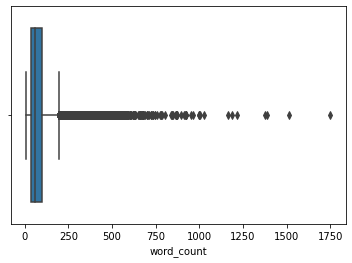

In [108]:
sns.boxplot(df['word_count'])

In [109]:
fig = px.histogram(df, x="word_count", labels={'x':'Word Count', 'y':'Number of review_text'})
fig.show()

In [110]:
fig = px.histogram(df, x="char_count", labels={'x':'Char Count', 'y':'Number of review_text'})
fig.show()

In [111]:
fig = px.histogram(df, x="word_density")
fig.show()

##Remove outlier

In [112]:
# IQR
Q1 = np.percentile(df['word_count'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['word_count'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("IQR = ",IQR)

# Above Upper bound
upper = (Q3+1.5*IQR)
print("Upper bound:",upper)

 
# Below Lower bound
lower = (Q1-1.5*IQR)
print("Lower bound:", lower)


IQR =  64.0
Upper bound: 194.0
Lower bound: -62.0


In [113]:
#Remove outlier
df = df[df['word_count'] <= 175]
df = df[df['word_count'] > 0]
df['word_count'].unique()

array([ 48,  31,  94,  41,  27,  72,  49,  24,  26,  25, 146,  64,  79,
        15,  22,  42, 131,  29,  44,  45,  19,  59,  14,  20,  36,  89,
        18,  90,  74,  43,  47, 105, 112,  35,  39,  50,  37,  70,  33,
        66,  34,  32,  23,  30,  17, 173,  54, 135,  87, 125,  95,  60,
        80,  63,  82, 127,  38,  61, 158,  57,  77,  52,  16, 133,  56,
        40,  73, 128,  46, 102,  71, 163,  53,  75,  21,  88,  62,  68,
        28, 132, 165, 120, 100, 116, 107,  84,  67,  97, 161, 110, 109,
        58, 140, 124, 111, 145,  91,  85,  55, 118, 175, 168, 134, 104,
       154,  78, 113, 166,  13,  96, 106, 108,  99,  51, 144,  69, 151,
       122, 139,  81, 141, 147, 115,  92, 121,  65, 148,  86,  83, 101,
       119, 114, 143, 130, 117, 167, 138, 169,  98, 157, 156, 150,  93,
       126,  76, 136, 152, 153, 160, 103, 162, 129, 164, 149, 170,  12,
       172, 155, 174, 123, 137, 159, 171, 142,  10,  11,   6,   7,   8])

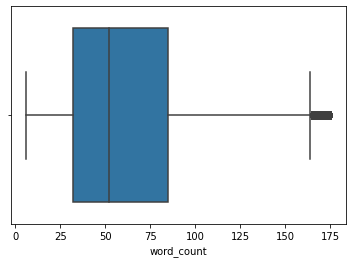

In [114]:
sns.boxplot(x = df['word_count'])

#Pre-processing

##Label by Vader Lexicon

In [115]:
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['review_text']]
df.head(5)

,index,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text,word_count,char_count,word_density,compound
0,0,1,B001E4KFG0,delmartian,1,1,5,"Reviewed in the United States on October 14, 2022",Good Quality Dog Food,I have bought several of the Vitality canned d...,48,215,0.222222,0.9441
1,1,2,B00813GRG4,dll pa,0,0,1,"Reviewed in the United States on October 19, 2022",Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,160,0.192547,-0.5664
2,2,3,B000LQOCH0,"Natalia Corres ""Natalia Corres""",1,1,4,"Reviewed in the United States on August 22, 2022","""Delight"" says it all",This is a confection that has been around a fe...,94,411,0.228155,0.8265
3,3,4,B000UA0QIQ,Karl,3,3,2,"Reviewed in the United States on October 13, 2022",Cough Medicine,If you are looking for the secret ingredient i...,41,177,0.230337,0.0000
4,4,5,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",0,0,5,"Reviewed in the United States on September 10,...",Great taffy,Great taffy at a great price. There was a wid...,27,111,0.241071,0.9468


In [116]:
first_column = df['compound'];
corpus_first = [];
a = [];
for x in (first_column): 
    corpus_first.append(x)
for doc in  corpus_first:
	if doc <= -0.05:
		a.append("negative")
	elif doc >= 0.05:
		a.append("positive")
	else:
		a.append("neutral")
s1 = pd.Series(a,index=df.index)
df['label_lexicon'] = s1


##Label by rating

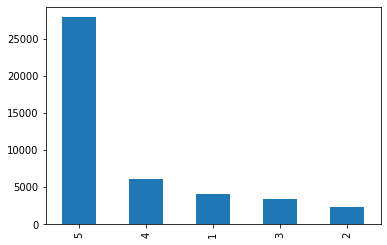

In [117]:
df['review_rating'].value_counts().plot(kind='bar');

In [118]:
conditions = [
    (df['review_rating'] <= 2),
    (df['review_rating'] == 3),
    (df['review_rating'] >= 4)
]

values = ['negative', 'neutral', 'positive']

df['label_rating'] = np.select(conditions, values)

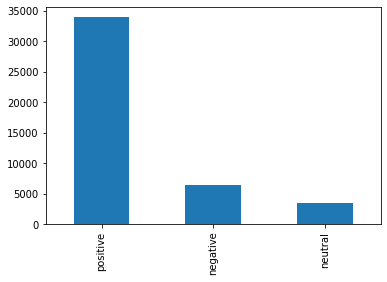

In [119]:
df['label_rating'].value_counts().plot(kind='bar');

###Combinate column label_lexicon and label_rating

In [120]:
df = df[df.label_lexicon == df.label_rating]
df

,index,Id,review_product,review_name,HelpfulnessNumerator,HelpfulnessDenominator,review_rating,review_date,review_title,review_text,word_count,char_count,word_density,compound,label_lexicon,label_rating
0,0,1,B001E4KFG0,delmartian,1,1,5,"Reviewed in the United States on October 14, 2022",Good Quality Dog Food,I have bought several of the Vitality canned d...,48,215,0.222222,0.9441,positive,positive
1,1,2,B00813GRG4,dll pa,0,0,1,"Reviewed in the United States on October 19, 2022",Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,160,0.192547,-0.5664,negative,negative
2,2,3,B000LQOCH0,"Natalia Corres ""Natalia Corres""",1,1,4,"Reviewed in the United States on August 22, 2022","""Delight"" says it all",This is a confection that has been around a fe...,94,411,0.228155,0.8265,positive,positive
4,4,5,B006K2ZZ7K,"Michael D. Bigham ""M. Wassir""",0,0,5,"Reviewed in the United States on September 10,...",Great taffy,Great taffy at a great price. There was a wid...,27,111,0.241071,0.9468,positive,positive
5,5,6,B006K2ZZ7K,Twoapennything,0,0,4,"Reviewed in the United States on September 22,...",Nice Taffy,I got a wild hair for taffy and ordered this f...,72,345,0.208092,0.8830,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47657,47657,47658,B0088OIA66,missc1115,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My sick cat loved this stuff,I had an elderly cat with kidney disease and s...,31,132,0.233083,0.3612,positive,positive
47658,47658,47659,B0088OIA66,Joanna Daneman,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",Cat's health immediately improved,I have a cat who has to have a calorie-restric...,106,424,0.249412,0.7795,positive,positive
47659,47659,47660,B0088OIA66,Yini-Rowenna Dubois,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My cats love some of the variety pack flavors.,They like the product and it's healthy (accord...,26,120,0.214876,0.9274,positive,positive
47660,47660,47661,B0088OIA66,Christian S. Tice,0,0,5,"Reviewed in the United States 🇺🇸 on April 30, ...",My Cat loves this stuff...,My 13-year old male cat has been a non-fish ea...,120,532,0.225141,0.9285,positive,positive


##Create label dummy variables

In [121]:
d = {
   'negative': -1,
   'neutral': 0,
   'positive': 1
   }
df['label_rating'] = df['label_rating'].map(d)

##Remove punctuation, Lowering the text and Lemmatization

In [122]:
df_corpus_text = pd.DataFrame(df['review_text'])

#Remove punctuation and icon
df_corpus_text['text_processed'] = df_corpus_text['review_text'].apply(lambda x: re.sub(r'[^(a-z|A-Z|)]', ' ', str(x)))

#Lowering the text
df_corpus_text['text_processed'] = df_corpus_text['text_processed'].apply(lambda x: x.lower())

#Lemmatizer
lemmatizer = WordNetLemmatizer()
df_corpus_text['text_lemmatize'] = df_corpus_text['text_processed'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

df_corpus_text


,review_text,text_processed,text_lemmatize
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,product arrived labeled a jumbo salted peanut ...
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...,this is a confection that ha been around a few...
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...,great taffy at a great price there wa a wide a...
5,I got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...
...,...,...,...
47657,I had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...
47658,I have a cat who has to have a calorie-restric...,i have a cat who has to have a calorie restric...,i have a cat who ha to have a calorie restrict...
47659,They like the product and it's healthy (accord...,they like the product and it s healthy (accord...,they like the product and it s healthy (accord...
47660,My 13-year old male cat has been a non-fish ea...,my year old male cat has been a non fish ea...,my year old male cat ha been a non fish eater ...


##Correcting repeating characters

In [123]:
def remove_repeated_characters(text):
  tokens = nltk.word_tokenize(text)
  repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
  match_substitution = r'\1\2\3'
  def replace(old_word):
    if wordnet.synsets(old_word):
      return old_word
    new_word = repeat_pattern.sub(match_substitution, old_word)
    return replace(new_word) if new_word != old_word else new_word
  
  correct_tokens = [replace(word) for word in tokens]
  return correct_tokens

In [124]:
df_corpus_text['remove_repeat'] = df_corpus_text['text_lemmatize'].apply(lambda x: ' '.join(remove_repeated_characters(x)))

##Stopwords

In [125]:
#Stopwords
stop_words = set(stopwords.words('english'))

df_corpus_text['text_word_token'] = df_corpus_text['remove_repeat'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in (stop_words)))
df_corpus_text

,review_text,text_processed,text_lemmatize,remove_repeat,text_word_token
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,product arrived labeled a jumbo salted peanut ...,product arrived labeled a jumbo salted peanut ...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...,this is a confection that ha been around a few...,this is a confection that ha been around a few...,confection ha around century light pilowy citr...
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...,great taffy at a great price there wa a wide a...,great taffy at a great price there wa a wide a...,great taffy great price wa wide assortment yum...
5,I got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...,got wild hair taffy ordered five pound bag taf...
...,...,...,...,...,...
47657,I had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...,elderly cat kidney disease stomach tumor think...
47658,I have a cat who has to have a calorie-restric...,i have a cat who has to have a calorie restric...,i have a cat who ha to have a calorie restrict...,i have a cat who ha to have a calorie restrict...,cat ha calorie restricted diet wa well rx food...
47659,They like the product and it's healthy (accord...,they like the product and it s healthy (accord...,they like the product and it s healthy (accord...,they like the product and it s healthy ( accor...,like product healthy ( according company ) two...
47660,My 13-year old male cat has been a non-fish ea...,my year old male cat has been a non fish ea...,my year old male cat ha been a non fish eater ...,my year old male cat ha been a non fish eater ...,year old male cat ha non fish eater whole life...


##POS (Part-of-Speech tagging)

In [126]:
stop_words = set(stopwords.words('english'))
# sent_tokenize is one of instances of
# PunktSentenceTokenizer from the nltk.tokenize.punkt module
text = " ".join(cat for cat in df_corpus_text['text_word_token'])
tokenized = sent_tokenize(text)
for i in tokenized:
  # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
 
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
 
    print(tagged)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [127]:
tagged_token = word_tokenize(text)
tagged_pos = pos_tag(tagged_token)
#keep 'NN','NNP','NNS','NNPS','JJ','JJR','JJS','RB','RBR','RBS','VB','VBG'
df_corpus_tagged = [word for word,pos in tagged_pos if pos in ['NN','NNP','NNS','NNPS','JJ','JJR','JJS','RB','RBR','RBS','VB','VBG'] ]
print(df_corpus_tagged)
set1 = set(df_corpus_tagged)
print(type(set1))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Match Pos tag with review text

In [128]:
df_corpus_text['text_tagged']= df_corpus_text['text_word_token'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word  in set1))
df_corpus_text

,review_text,text_processed,text_lemmatize,remove_repeat,text_word_token,text_tagged
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,product arrived labeled a jumbo salted peanut ...,product arrived labeled a jumbo salted peanut ...,product arrived labeled jumbo salted peanut pe...,product arrived labeled jumbo salted peanut pe...
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...,this is a confection that ha been around a few...,this is a confection that ha been around a few...,confection ha around century light pilowy citr...,confection ha around century light pilowy citr...
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...,great taffy at a great price there wa a wide a...,great taffy at a great price there wa a wide a...,great taffy great price wa wide assortment yum...,great taffy great price wa wide assortment yum...
5,I got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...,got wild hair taffy ordered five pound bag taf...,got wild hair taffy ordered pound bag taffy wa...
...,...,...,...,...,...,...
47657,I had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...,i had an elderly cat with kidney disease and s...,elderly cat kidney disease stomach tumor think...,elderly cat kidney disease stomach tumor think...
47658,I have a cat who has to have a calorie-restric...,i have a cat who has to have a calorie restric...,i have a cat who ha to have a calorie restrict...,i have a cat who ha to have a calorie restrict...,cat ha calorie restricted diet wa well rx food...,cat ha calorie restricted diet wa well rx food...
47659,They like the product and it's healthy (accord...,they like the product and it s healthy (accord...,they like the product and it s healthy (accord...,they like the product and it s healthy ( accor...,like product healthy ( according company ) two...,like product healthy according company cat lov...
47660,My 13-year old male cat has been a non-fish ea...,my year old male cat has been a non fish ea...,my year old male cat ha been a non fish eater ...,my year old male cat ha been a non fish eater ...,year old male cat ha non fish eater whole life...,year old male cat ha non fish eater whole life...


## Split into training test and test set

In [129]:
from sklearn.model_selection import train_test_split
train_corpus, test_corpus, train_label, test_label = train_test_split(
                                                      np.array(df_corpus_text['text_tagged']),
                                                      np.array(df['label_rating']), 
                                                      test_size=0.2, random_state=42)

In [130]:
train_corpus.shape, test_corpus.shape

((27928,), (6983,))

In [131]:
train_corpus

array(['warning even make food company look back bag even list made say guaranteed canidae asked wa made wa br br either completely ignored br br huge run around thing ever got wa state wa made even tell company br br dangerous pet food recall happened year ago sourcing manufacturing',
       'love coffee look forward daily cup morning ha wonderful flavor tried brand seem taste artificial one taste real',
       'minor ha best beef base ever tryed salty beef stock price bit high think worth wast money brand try monor',
       ...,
       'pancake mix best easiest mix ever tried hard pressed find better pancake make home',
       'kitten started hanging outside house started feeding rather buying smaller bag great value multiple cat kitten love food always look forward eating shipped right door go wrong',
       'dog eat grenie everymorning expensive everywhere store wa happy find many inexpensive price great deal'],
      dtype=object)

##TF - IDF

In [132]:
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(train_corpus)

tv_test_features = tv.transform(test_corpus)

In [133]:
print('TFIDF model:> Train features shape:', tv_train_features.shape,
      'Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (27928, 20422) Test features shape: (6983, 20422)


In [134]:
df_results = pd.DataFrame(tv_train_features.toarray(), columns=tv.get_feature_names_out())
df_results

,aa,aaa,aah,aahs,ab,aback,abandon,abandoned,abates,abc,...,zsvo,zt,zua,zucchini,zuke,zukes,zuma,zupa,zupas,zyn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Modeling

##Ordinal Logistic Regression

In [135]:
logit = LogisticIT(alpha=0.0)
logit.fit(tv_train_features, train_label)
print('theta', logit.theta_)
print('coefficients', logit.coef_)
print()
probs= logit.predict_proba(tv_train_features)
results = pd.DataFrame({
'actual': train_label, 'predicted': logit.predict(tv_train_features),
'P(-1)': [p[0] for p in probs],
'P(0)': [p[1] for p in probs],
'P(1)': [p[2] for p in probs],
})
print(results.head())

theta [-217.56459095 -123.97712093]
coefficients [-328.27507126   15.64612568    6.68297873 ...    2.00160274  -57.89737178
    0.81272158]

   actual  predicted          P(-1)           P(0)  P(1)
0      -1         -1   1.000000e+00   0.000000e+00   0.0
1       1          1   0.000000e+00   0.000000e+00   1.0
2       1          1  1.348958e-192  5.950044e-152   1.0
3       1          1   0.000000e+00   0.000000e+00   1.0
4       1          1   0.000000e+00   0.000000e+00   1.0


In [136]:
label_pred = logit.predict(tv_test_features)
label_pred

array([1, 1, 1, ..., 1, 1, 1])

In [137]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_label, label_pred)
  
print ("Confusion Matrix : \n", conf_matrix)

Confusion Matrix : 
 [[ 384   45  111]
 [   6    5   16]
 [  76   54 6286]]


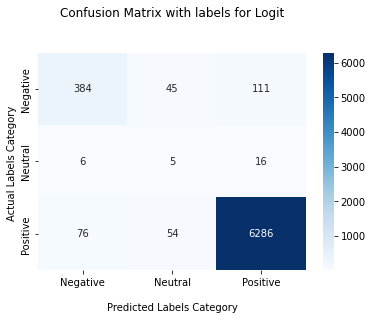

In [138]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Confusion Matrix with labels for Logit\n\n');
ax.set_xlabel('\nPredicted Labels Category')
ax.set_ylabel('Actual Labels Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([ 'Negative','Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [139]:
print(classification_report(test_label, label_pred))

              precision    recall  f1-score   support

          -1       0.82      0.71      0.76       540
           0       0.05      0.19      0.08        27
           1       0.98      0.98      0.98      6416

    accuracy                           0.96      6983
   macro avg       0.62      0.63      0.61      6983
weighted avg       0.96      0.96      0.96      6983



In [140]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(test_label, label_pred)))

Model accuracy score: 0.9559


## Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

In [142]:
tree2 = DecisionTreeClassifier(random_state=1, criterion='gini')

In [143]:
tree2 = tree2.fit(tv_train_features, train_label)

In [144]:
predict_label = tree2.predict(tv_test_features)

In [145]:
conf_matrix2 = confusion_matrix(test_label, predict_label)
conf_matrix2 

array([[ 287,    2,  251],
       [   3,    4,   20],
       [ 221,   15, 6180]])

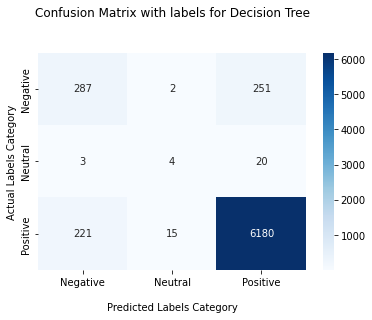

In [146]:
ax2 = sns.heatmap(conf_matrix2, annot=True, cmap='Blues',fmt="d")

ax2.set_title('Confusion Matrix with labels for Decision Tree\n\n');
ax2.set_xlabel('\nPredicted Labels Category')
ax2.set_ylabel('Actual Labels Category');

## Ticket labels - List must be in alphabetical order
ax2.xaxis.set_ticklabels([ 'Negative','Neutral', 'Positive'])
ax2.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [147]:
print(classification_report(test_label, predict_label))

              precision    recall  f1-score   support

          -1       0.56      0.53      0.55       540
           0       0.19      0.15      0.17        27
           1       0.96      0.96      0.96      6416

    accuracy                           0.93      6983
   macro avg       0.57      0.55      0.56      6983
weighted avg       0.92      0.93      0.93      6983



In [148]:
#Accuracy:
tree2.score(tv_test_features, test_label)

0.9266790777602749